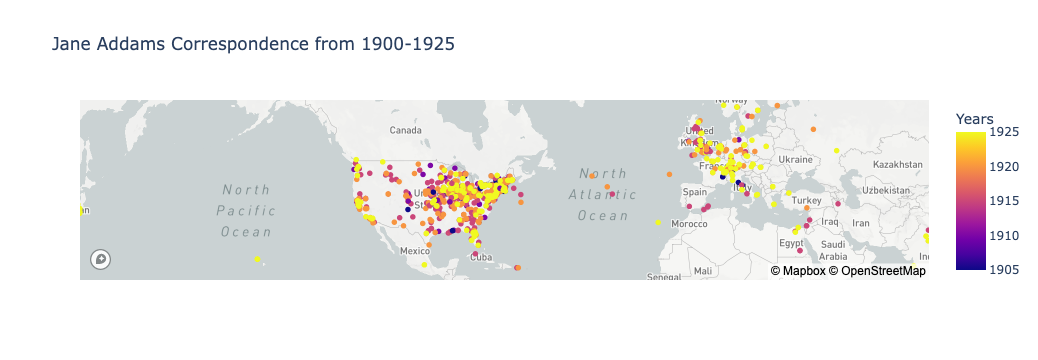

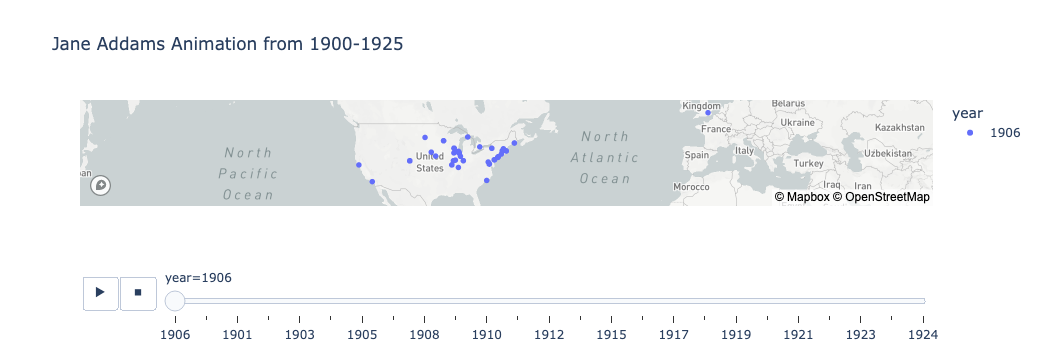

In [189]:
import geopandas as gpd
import pandas as pd
import json
import numpy as np
import plotly as plt
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as offline
from plotly.graph_objs import *
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

px.set_mapbox_access_token("pk.eyJ1Ijoib2x1aXNpIiwiYSI6ImNsb2VsMG94eTA3eGUyanFydmR6c3c2MW0ifQ.koiidwyYe2AIYGWn1UxJrA")

"""
def add_lat(df):
    new_df = df.copy()
    result = []
    for index, row in new_df.iterrows():
        value = str(row['geometry'])
        first = value.split("(")
        second = first[1].split(" ")
        if len(second) > 1:
            third = second[1]
            fourth = third.replace(")", "")
            fourth = float(fourth)
            result.append(fourth)
        else: 
            result.append(np.nan)
    return result

def add_lon(df):
    new_df = df.copy()
    result = []
    for index, row in new_df.iterrows():
        value = str(row['geometry'])
        first = value.split("(")
        second = first[1].split(" ")
        if len(second) > 1:
            third = second[0]
            result.append(third)
        else: 
            result.append(np.nan)
    return result
"""

def add_year(df):
    new_df = df.copy()
    result = []
    for index, row in new_df.iterrows():
        value = str(row['date'])
        first = value.split(">")
        second = first[1].split("-")
        third = second[0]
        third = third.replace("</a", "")
        # Special case for the two dates input incorrectly
        if len(third) == 5:
            third = third.replace("0", "")
        elif len(third) > 4:
            third = third.split(" ")
            third = third[2]
        third = str(third)
        result.append(third)
    return result

def count_per_years(df):
    new_df = df.copy()
    results = []
    for index, row in new_df.iterrows():
        if int(row['year']) >= 1900 and int(row['year']) <= 1905:
            results.append(1905)
        elif int(row['year']) >= 1906 and int(row['year']) <= 1910:
            results.append(1910)
        elif int(row['year']) >= 1911 and int(row['year']) <= 1915:
            results.append(1915)
        elif int(row['year']) >= 1916 and int(row['year']) <= 1920:
            results.append(1920)
        elif int(row['year']) >= 1921 and int(row['year']) <= 1924:
            results.append(1925)
        elif int(row['year']) and int(row['year']) <= 1930:
            results.append(np.NaN)
        else:
            results.append(np.NaN)
    return results

def ani_mapping(df):
    fig = px.scatter_mapbox(df, lat=df.geometry.y, lon=df.geometry.x,
                            color="year", hover_name="title",
                            animation_group="title",animation_frame="year",
                            title="Jane Addams Animation from 1900-1925", zoom=1,
                            labels={"year":"Years"})
    fig.show()
    
def text_mapping(df):
    fig = px.scatter_mapbox(df, lat=df.geometry.y, lon=df.geometry.x,
                            color="group", hover_name="title",
                            title="Jane Addams Correspondence from 1900-1925", zoom=1,
                            labels={"group":"Years"})
    fig.update_layout(
    fig.show()

# Reading in full DF
JAPP_df = gpd.read_file("JAPP.json")
JAPP_df.head(5)

# Getting types of items
#itemTypes = set()
#for value in JAPP_df['itemtype']:
#    itemTypes.add(value)
#print(itemTypes)

# Seperating DF into itemTypes
people_JAPP = JAPP_df[JAPP_df['itemtype'] == 'Person']
org_JAPP = JAPP_df[JAPP_df['itemtype'] == 'Organization']
nonyear_text_JAPP = JAPP_df[JAPP_df['itemtype'] == 'Text']

# Add 'year' column cleaned from the href string from 'date' column
nonyear_text_JAPP = nonyear_text_JAPP.dropna()
text_JAPP = nonyear_text_JAPP.copy()
text_JAPP['year'] = add_year(nonyear_text_JAPP)

# Seperate year groups into a group index
text_JAPP['group'] = count_per_years(text_JAPP)

text_JAPP = text_JAPP.dropna()
text_mapping(text_JAPP)
ani_mapping(text_JAPP)


# These are the years we're working with now:
# 1841, 1900, 1901, 1902, 1903, 1904, 1905, 1906,
# 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914,
# 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922,
# 1923, 1924, 1925, 1926, 1927, 1928, 1930, 1931
# So let's examine these:
# 1900-1905, 1906-1910, 1911-1915, 1916-1920,
# 1921-1925, 1926-1930

